## 📉 Employee Attrition Analysis using Statistical Methods

### Overview
This project explores how statistical techniques can inform and guide business decisions, using the case of employee attrition. We use the IBM HR Analytics Attrition Dataset to identify key drivers of attrition and simulate future trends. This study is conducted in Python and aligns with core statistical methods taught in university, including confidence intervals, hypothesis testing, regression, and simulation.

### Business Problem

Employee attrition presents a critical challenge for organizations, leading to increased recruitment costs, productivity loss, and disruption in team dynamics. Our objective is to:
- Understand key factors contributing to employee attrition.
- Quantify the effects of those factors using statistical methods.
- Simulate potential business outcomes under different attrition rates.
- Recommend actionable strategies to reduce attrition.

### Statistical Techniques Used
- 📊 **Descriptive Statistics**: Summary of employee demographics and attrition rate.
- ✅ **Confidence Intervals**: Estimating the population attrition rate with 95% certainty.
- 🧪 **Hypothesis Testing**: Using Chi-square and t-tests to identify significant factors (e.g., overtime, income).
- 🔁 **Simulation Analysis**: Modeling future workforce size based on varying attrition rates.
- 📈 **Logistic Regression**: Predicting probability of attrition based on features such as OverTime, JobSatisfaction, and MonthlyIncome.

### Tools & Libraries
- Python 3.9+
- pandas
- numpy
- scipy
- statsmodels
- matplotlib
- seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [3]:
# Set visualization style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)


### 1. Load and Explore the Dataset

We load the dataset and take a quick look at its structure and key columns.

In [5]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the first few rows and summary of attrition counts
print(df.head())
print("\nAttrition Value Counts:\n", df['Attrition'].value_counts())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

## 2. Descriptive Statistics & Confidence Interval for Attrition Rate

We calculate the overall attrition rate and create a 95% confidence interval for this proportion.

In [10]:
p_hat = (df['Attrition'] == 'Yes').mean()
n = len(df)
z = 1.96  # z-score for 95% CI

# Calculate the standard error and confidence interval
se = np.sqrt((p_hat * (1 - p_hat)) / n)
ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print(f"Attrition Rate: {p_hat:.3f}")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

Attrition Rate: 0.161
95% Confidence Interval: (0.142, 0.180)


**Attrition Rate:** Proportion of employees who left. From our dataset, approximately 16.1% of employees have left <br>
**Confidence Interval:** We are 95% confident that the true attrition rate in the population lies within [0.142, 0.180]. This metric is key to understanding the reliability of our sample-based estimation.

## 3. Hypothesis Testing

We now conduct two hypothesis tests:

### A. Chi-Square Test: Effect of OverTime on Attrition

**Hypothesis:**  

**Null (H₀):** There is no association between working overtime and attrition. <br>
**Method:** We create a contingency table for `OverTime` vs. `Attrition` and perform a chi-square test.

In [14]:
# Create a contingency table for OverTime and Attrition
ct = pd.crosstab(df['OverTime'], df['Attrition'])
print("Contingency Table:")
print(ct)

# Perform the Chi-square test for independence
chi2, p_val, dof, expected = chi2_contingency(ct)
print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"P-value: {p_val:.7f}")

Contingency Table:
Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127

Chi-square Statistic: 87.56
P-value: 0.0000000


**Contingency Table:** This table shows the counts of employees with and without overtime, broken down by attrition status. <br>
**Chi-square Statistic & P-value:** A low p-value (typically < 0.05) indicates that there is a statistically significant association between working overtime and attrition. This supports the idea that overtime may affect employee turnover.

### B. Two-Sample t-Test: Comparing Monthly Income
**Hypothesis:**  

**Null (H₀):** There is no difference in average monthly income between employees who left and those who stayed. <br>
**Method:** We use a two-sample t-test assuming unequal variances to compare the mean monthly income between the two groups.

In [18]:
# Split the dataset by attrition status
yes_income = df[df['Attrition'] == 'Yes']['MonthlyIncome']
no_income = df[df['Attrition'] == 'No']['MonthlyIncome']

# Conduct the two-sample t-test
t_stat, p_val_income = stats.ttest_ind(yes_income, no_income, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val_income:.4f}")

T-statistic: -7.48
P-value: 0.0000


**T-statistic & P-value:** The t-statistic measures the difference in means relative to the overall variability. A p-value below 0.05 indicates that the difference in monthly income between employees who left versus those who stayed is statistically significant. This finding can inform compensation-related interventions.


## 4. Logistic Regression Analysis
We build a logistic regression model to quantify which factors predict attrition. In this model: <br>
- **Dependent Variable:** Attrition (encoded as 1 for 'Yes' and 0 for 'No'). <br>
- **Features:** Age, MonthlyIncome, OverTime, JobSatisfaction, and DistanceFromHome. <br>

**Preparation:**  
We encode categorical variables like OverTime using one-hot encoding.<br>

**Significance:**  
The logistic regression model will allow us to interpret the odds of attrition based on each feature.

In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import statsmodels.api as sm

# Copy the original DataFrame
df_model = df.copy()

# Encode Attrition: Yes = 1, No = 0
df_model['Attrition'] = LabelEncoder().fit_transform(df_model['Attrition'])

# Select relevant features and the target variable
features = ['Age', 'MonthlyIncome', 'OverTime', 'JobSatisfaction', 'DistanceFromHome']
df_model = df_model[features + ['Attrition']]

# One-hot encode the categorical variable 'OverTime'
df_model = pd.get_dummies(df_model, columns=['OverTime'], drop_first=True)

# Define predictor (X) and target (y) variables
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Check data types of predictors before conversion
#print("Data types before conversion:")
#print(X.dtypes)

# Convert the boolean column to integer
if 'OverTime_Yes' in X.columns:
    X['OverTime_Yes'] = X['OverTime_Yes'].astype(int)

# Optionally, force the entire DataFrame to numeric (floats)
X = X.astype(float)

# Add constant for intercept
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.382401
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                  0.1342
Time:                        22:13:13   Log-Likelihood:                -562.13
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.717e-36
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2462      0.379      0.650      0.516      -0.496       0.988
Age        


- The regression summary table shows the coefficients, standard errors, z-scores, and p-values for each predictor.
- **Significance of Predictors:** Variables with p-values below 0.05 are considered significant predictors of attrition.
- **Interpretation:**  
  - A positive coefficient indicates that higher values of the predictor increase the odds of attrition.
  - Conversely, a negative coefficient suggests a protective effect against attrition.
- These insights inform which HR policies might be targeted (e.g., addressing excessive overtime or low job satisfaction).




## 5. Simulation: Forecasting Employee Count Over Time

We now simulate the future employee count over a set number of years, assuming a constant attrition rate. The simulation is repeated multiple times to obtain an average trajectory.

**Significance:**  
Simulation provides a visual and quantitative forecast of future staffing levels, enabling decision-makers to plan resource allocation and HR interventions.

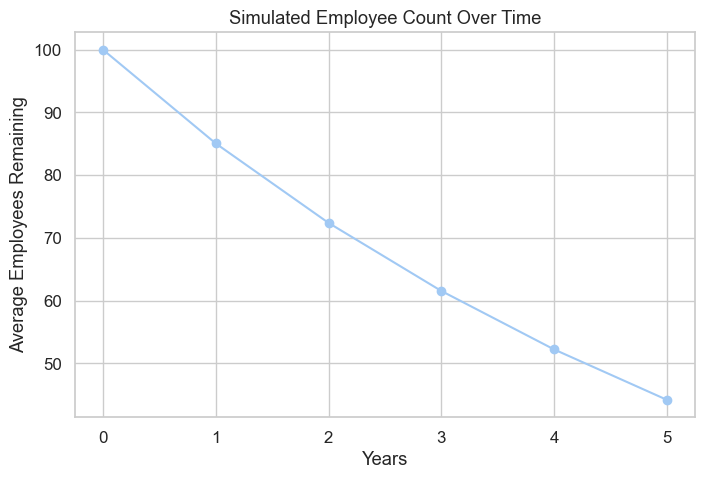

In [26]:
def simulate_attrition(start=100, attrition_rate=0.15, years=5, trials=1000):
    results = np.zeros((trials, years + 1))
    for t in range(trials):
        employees = start
        results[t][0] = employees
        for y in range(1, years + 1):
            employees = np.random.binomial(employees, 1 - attrition_rate)
            results[t][y] = employees
    return results

sim_results = simulate_attrition()
mean_employees = sim_results.mean(axis=0)

plt.figure(figsize=(8,5))
plt.plot(range(6), mean_employees, marker='o', color='b')
plt.title("Simulated Employee Count Over Time")
plt.xlabel("Years")
plt.ylabel("Average Employees Remaining")
plt.grid(True)
plt.show()


- **Plot:** The line chart shows the expected (average) number of employees remaining over a period of 5 years, given the constant attrition rate.
- **Significance:**  
  - This simulation highlights the potential long-term impact of attrition on workforce size.
  - It provides a visual tool for HR and management to understand the urgency of addressing high attrition rates.

## 6. Enhanced Visualizations with Seaborn
To further illustrate our findings, we create additional plots using Seaborn:

### A. Overall Attrition Count

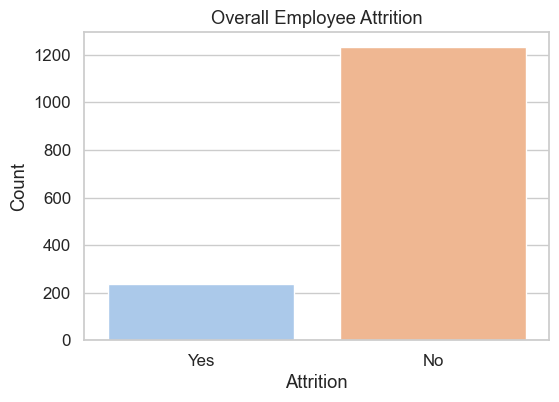

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', hue='Attrition', palette='pastel', legend=False)
plt.title("Overall Employee Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

- **Count Plot:** This plot displays the number of employees in each attrition category.
- It offers a quick visual summary of the dataset’s balance (or imbalance) between those who left and those who stayed.
  

### B. Attrition by OverTime

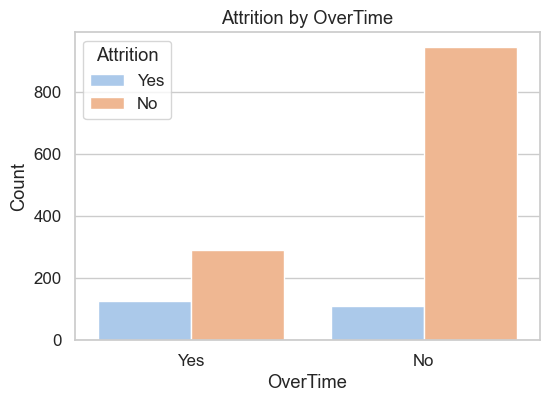

In [34]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel')
plt.title("Attrition by OverTime")
plt.xlabel("OverTime")
plt.ylabel("Count")

# Retrieve handles and labels from the Axes and then set the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Attrition')

plt.show()


- **Grouped Count Plot:** This visualization compares the number of employees who left versus stayed for both overtime categories.
- **Significance:**  
  - The plot helps to visually assess if employees working overtime are more likely to have left, complementing the chi-square test results.

### C. Income Distribution by Attrition (Density Plot)

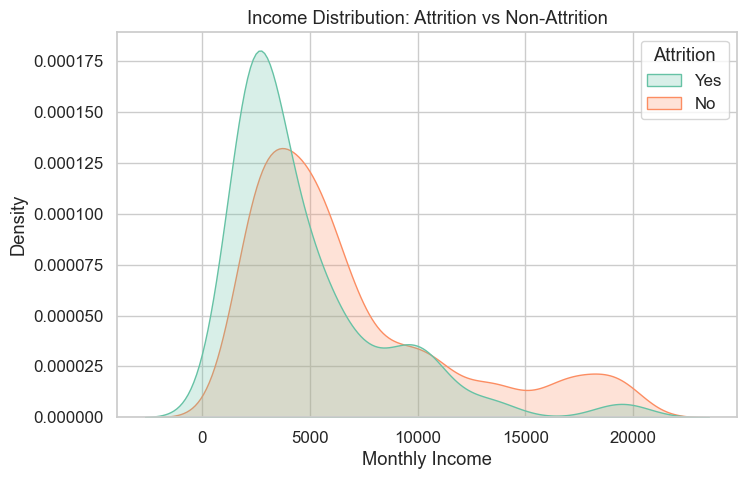

In [38]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='MonthlyIncome', hue='Attrition', fill=True, common_norm=False, palette='Set2')
plt.title("Income Distribution: Attrition vs Non-Attrition")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.show()

- **Density Plot:** This plot depicts the distribution of monthly incomes for both attrition groups (Yes vs. No).
- **Significance:**  
  - It visually represents differences in income distributions between groups, supporting the t-test findings on income disparities.

### D. Job Satisfaction by Attrition (Boxplot)

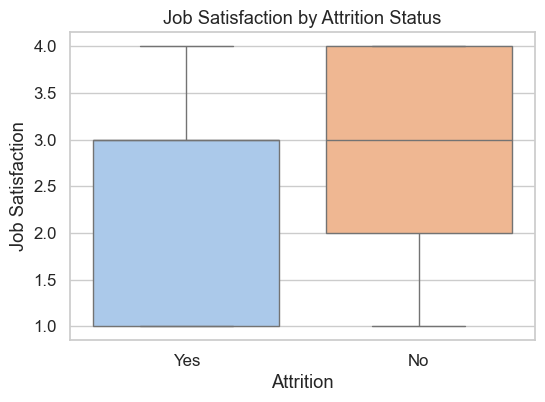

In [42]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', hue='Attrition', palette='pastel')
plt.title("Job Satisfaction by Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Job Satisfaction")
plt.show()


## 7. Summary & Business Recommendations

**Key Findings:**

- The **overall attrition rate** is estimated alongside a 95% confidence interval, demonstrating the expected range of attrition.
- **Hypothesis tests** indicate that both overtime and monthly income have statistically significant associations with attrition.
- A **logistic regression model** confirms that factors like overtime and job satisfaction significantly influence the odds of employee attrition.
- **Simulation analysis** provides a visual forecast of how continued attrition may reduce the workforce over time.

**Business Implications:**

- HR initiatives may target employees with high overtime or low job satisfaction.
- Compensation and workplace policies could be adjusted to mitigate identified risks.
- The simulation helps in forecasting and planning for future staffing needs.

This analysis demonstrates how statistical methods can drive actionable business solutions in HR management.